In [1]:
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

# pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
charlotte_nc_avg_temps = pd.read_csv('charlotte_nc_avg_temps.csv', index_col='year')
charlotte_nc_avg_temps_cp = charlotte_nc_avg_temps.interpolate(method='akima')
global_avg_temps = pd.read_csv('global_avg_temps.csv', index_col='year')

In [3]:
def moving_avg(df, n=5):
    mov_avg = []
    
    for k in range(len(df) - n + 1):
        mov_avg.append(sum(df['avg_temp'][k:k+n])/n)
        
    new_index = list(df.index[n-1:])
    new_df = pd.DataFrame(mov_avg, columns=['avg_temp'], index=new_index)

    return new_df

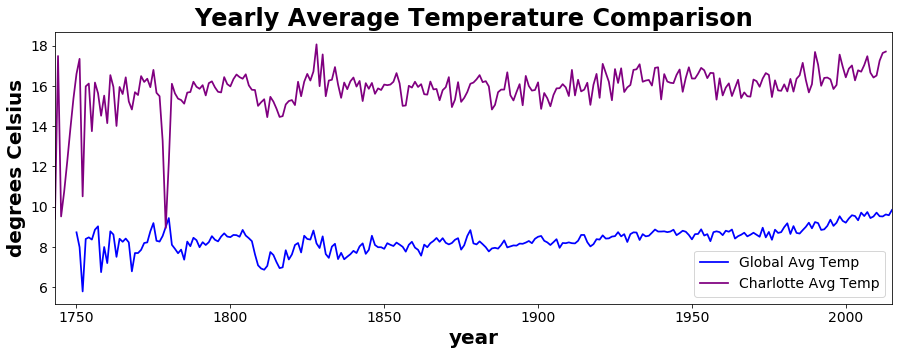

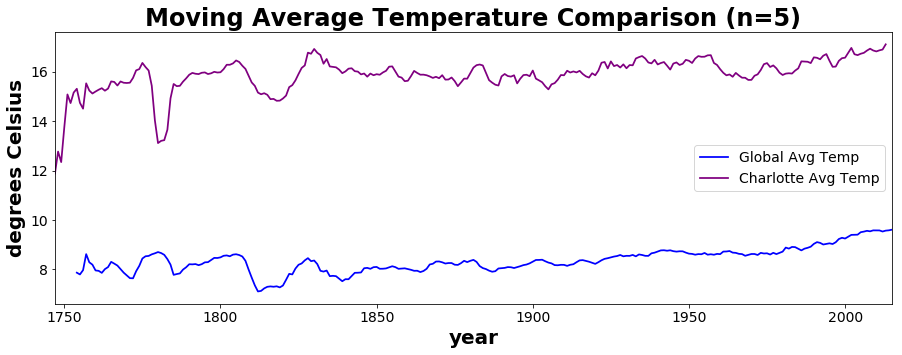

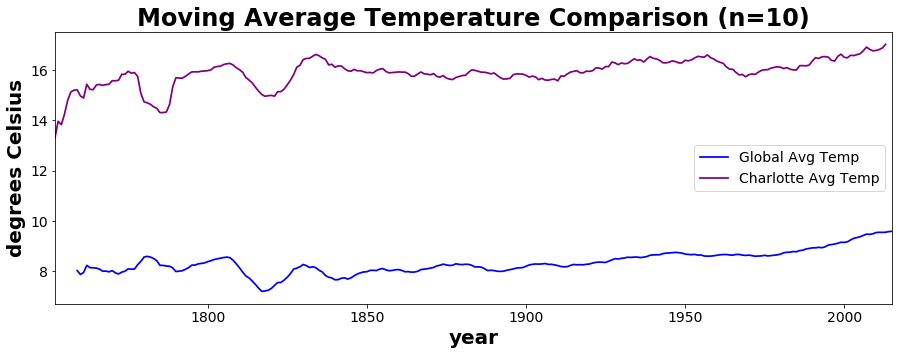

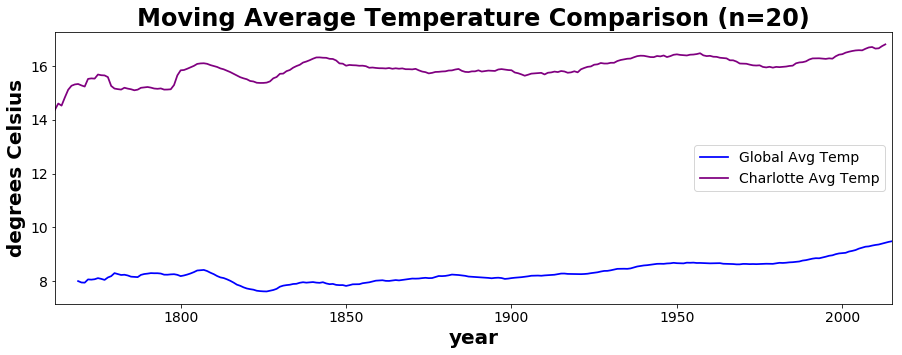

In [4]:
n_list = [1, 5, 10, 20]
fig_count = 0
for n in n_list:
    fig_count += 1
    charlotte_nc_avg_temps_cp_ma = moving_avg(charlotte_nc_avg_temps_cp, n)
    global_avg_temps_ma = moving_avg(global_avg_temps, n)
    plt.figure(fig_count)
    figure = global_avg_temps_ma['avg_temp'].plot(legend=False, color='blue', linewidth=1.75)
    charlotte_nc_avg_temps_cp_ma['avg_temp'].plot(ax=figure, legend=False, color='purple', linewidth=1.75)
    figure.legend(['Global Avg Temp', 'Charlotte Avg Temp'], loc='best', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('degrees Celsius', fontsize=20, fontweight='bold')
    plt.xlabel('year', fontsize=20, fontweight='bold')
    if n == 1:
        plt.title('Yearly Average Temperature Comparison', fontsize=24, fontweight='bold')
    else:
        plt.title('Moving Average Temperature Comparison (n=%s)'%n, fontsize=24, fontweight='bold')
    plt.show()
    plt.savefig('temp_comp_mov_avg_size_%s'%n)